In [144]:
import openGraphMatching.matcher as matcher
import networkx as nx
import pandas as pd
import numpy as np

import numpy as np # numpy backend
import pygmtools as pygm
import matplotlib.pyplot as plt # for plotting
from matplotlib.patches import ConnectionPatch # for plotting matching result
import networkx as nx # for plotting graphs
pygm.set_backend('numpy') # set default backend for pygmtools
import functools



In [145]:
def create_adjacency(df:pd.DataFrame)->np.array:
    m = max(max(df["zero"].value_counts().index), max(df["one"].value_counts().index)) + 1
    A = np.zeros((m,m))
    a,b = df["zero"].to_numpy(dtype=int), df["one"].to_numpy(dtype=int)

    A[a,b] =1
            
    return A

In [146]:
#handling the edges
data = pd.read_csv(r"data\email-Eu-core.txt.gz")
data = data.map(str.split)
series_0 = data.map(lambda x:x[0]).values.flatten()
series_1 = data.map(lambda x:x[1]).values.flatten()

to_integer = np.vectorize(int)
series_0 = to_integer(series_0)


df = pd.DataFrame({"zero": to_integer(series_0), "one": to_integer(series_1)})



In [147]:
# Handling the Labels
labels = pd.read_csv(r"data\email-Eu-core-department-labels.txt.gz")
labels= labels.map(str.split)
series_0 = labels.map(lambda x:x[0]).values.flatten()
series_1 = labels.map(lambda x:x[1]).values.flatten()

to_integer = np.vectorize(int)
labels = pd.DataFrame({"node": to_integer(series_0), "label": to_integer(series_1)})


In [176]:
comms = {label: list(labels[labels["label"] == label]["node"]) for label in labels["label"].unique()}
labels["community"] = labels["label"].map(comms)

A = create_adjacency(df)
eucore = nx.from_numpy_array(A)
nx.set_node_attributes(eucore, labels["community"], "community")
eucore.remove_node(1004)

In [177]:
data = pd.read_csv(r"data\email-Eu-core-temporal.txt.gz")
data = data.map(str.split)
series_d, series_0,  series_1, t = data.map(lambda x:(x[0], x[1])).values.flatten(),data.map(lambda x:x[0]).values.flatten(), data.map(lambda x:x[1]).values.flatten(), data.map(lambda x:x[2]).values.flatten()

series_d = pd.Series(series_d)
wt = pd.Series(series_d).value_counts()


to_integer = np.vectorize(int)
edges = pd.DataFrame({"zero": to_integer(series_0), "one": to_integer(series_1), "d": series_d, "w": series_d.map(lambda x: wt[x])})


edges

,zero,one,d,w
0,168,472,"(168, 472)",668
1,168,912,"(168, 912)",1212
2,2,790,"(2, 790)",229
3,2,322,"(2, 322)",10
4,2,790,"(2, 790)",229
...,...,...,...,...
332328,324,367,"(324, 367)",1
332329,790,126,"(790, 126)",150
332330,790,126,"(790, 126)",150
332331,782,126,"(782, 126)",54


In [183]:
E = create_adjacency(edges)
w_eucore = nx.from_numpy_array(E)
w_eucore
w_eucore.remove_node(1004)

In [184]:
conn1, edge1 = pygm.utils.dense_to_sparse(A)
conn2, edge2 = pygm.utils.dense_to_sparse(E)

In [185]:
labels

,node,label,community
0,1,1,"[1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 21..."
1,2,21,"[2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 1..."
2,3,21,"[2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 1..."
3,4,21,"[2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 1..."
4,5,25,"[5, 6, 64, 489, 528, 644]"
...,...,...,...
999,1000,4,"[14, 53, 65, 93, 95, 129, 133, 167, 168, 172, ..."
1000,1001,21,"[2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 1..."
1001,1002,1,"[1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 21..."
1002,1003,6,"[117, 127, 255, 435, 453, 472, 490, 491, 537, ..."


{0: [1,
  17,
  18,
  73,
  74,
  85,
  120,
  177,
  215,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  248,
  297,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  341,
  414,
  415,
  449,
  459,
  468,
  479,
  516,
  517,
  603,
  605,
  629,
  645,
  650,
  675,
  696,
  697,
  731,
  734,
  743,
  764,
  775,
  797,
  798,
  846,
  852,
  872,
  904,
  905,
  916,
  1002],
 1: [2,
  3,
  4,
  56,
  57,
  58,
  59,
  63,
  137,
  138,
  192,
  193,
  194,
  195,
  281,
  286,
  305,
  408,
  412,
  456,
  520,
  532,
  571,
  586,
  587,
  606,
  622,
  625,
  633,
  634,
  635,
  636,
  648,
  670,
  685,
  691,
  711,
  718,
  755,
  762,
  774,
  803,
  815,
  826,
  832,
  845,
  849,
  863,
  865,
  880,
  882,
  884,
  899,
  901,
  921,
  928,
  982,
  990,
  993,
  994,
  1001],
 2: [2,
  3,
  4,
  56,
  57,
  58,
  59,
  63,
  137,
  138,
  192,
  193,
  194,
  195,
  281,
  286,
  305,
  408,
  412,
  456,
 

In [257]:
nx.set_node_attributes(w_eucore,{x:eucore.nodes[x]["community"] for x in w_eucore.nodes}, "community")

In [258]:
lcc= nx.weakly_connected_components(nx.DiGraph(eucore))
lcc = eucore.subgraph(frozenset(list(lcc)[0]))


In [259]:
nx.community.modularity(w_eucore,nx.community.louvain_communities(w_eucore))

0.41363048825870896

In [260]:


pos = nx.spring_layout(lcc)

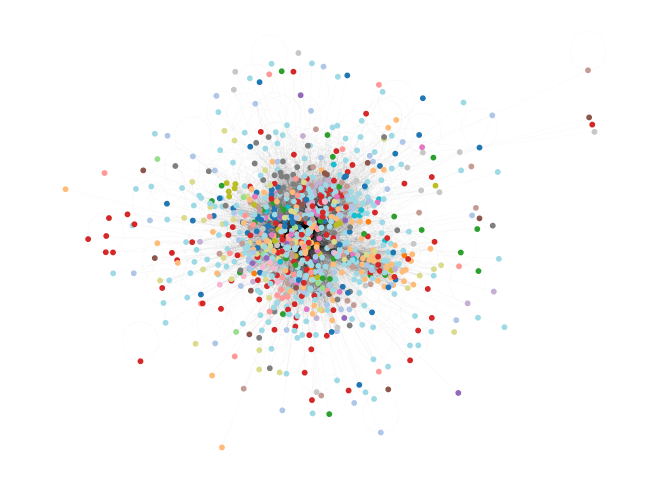

In [261]:
color_dict = {}

a = [frozenset(lcc.nodes[v]['community']) for v in lcc]   

for node in a:
    if node not in color_dict:
        color_dict[node] = 0

for i,key in enumerate(color_dict.keys()):
    color_dict[key] = plt.colormaps["tab20"](i)


node_colors = [color_dict[frozenset(lcc.nodes[node]['community'])] for node in lcc.nodes]
nx.draw(lcc, pos=pos, node_color=node_colors, node_size=10, alpha=1, width=0.01)


In [262]:
w_eucore.nodes[0]

{'community': [1,
  17,
  18,
  73,
  74,
  85,
  120,
  177,
  215,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  248,
  297,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  341,
  414,
  415,
  449,
  459,
  468,
  479,
  516,
  517,
  603,
  605,
  629,
  645,
  650,
  675,
  696,
  697,
  731,
  734,
  743,
  764,
  775,
  797,
  798,
  846,
  852,
  872,
  904,
  905,
  916,
  1002]}

In [272]:
color_dict = {}

a = [frozenset(w_eucore.nodes[v]['community']) for v in w_eucore]   

for node in a:
    if node not in color_dict:
        color_dict[node] = 0

for i,key in enumerate(color_dict.keys()):
    color_dict[key] = plt.colormaps["tab20"](i)


color_dict[frozenset(w_eucore.nodes[0]["community"])]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

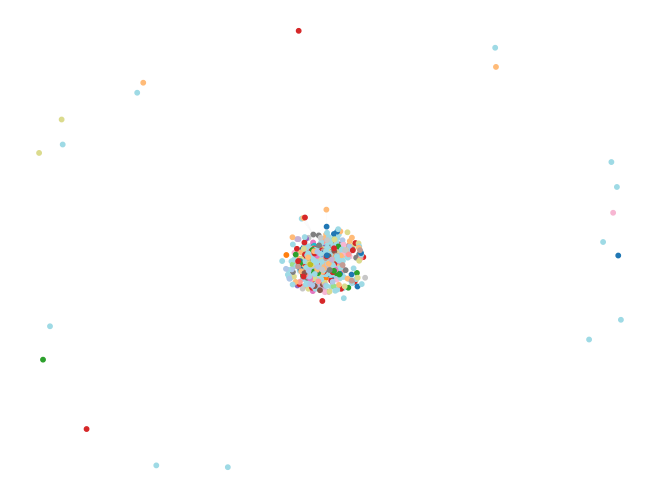

In [274]:
pos = nx.spring_layout(w_eucore)
node_colors = [color_dict[frozenset(w_eucore.nodes[node]['community'])] for node in w_eucore.nodes]
nx.draw(w_eucore, pos=pos, node_color=node_colors, node_size=10, alpha=1, width=0.01)


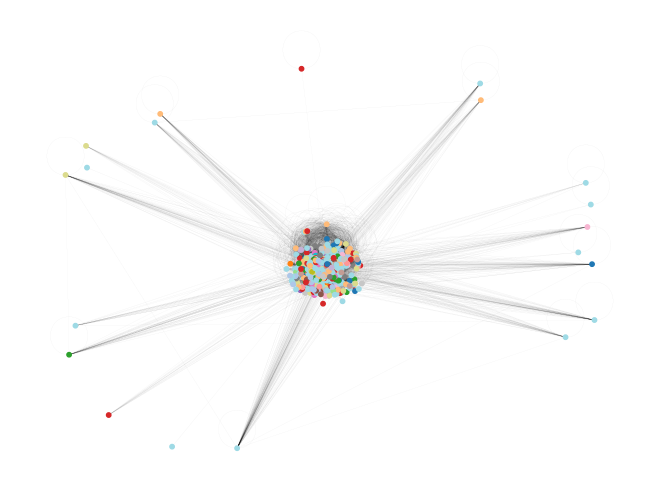

In [275]:
nx.draw(eucore, pos=pos, node_color=node_colors, node_size=10, alpha=1, width=0.01)